In [1]:
%matplotlib notebook

In [2]:
import os
import pandas as pd
import numpy as np
from scipy import stats


In [3]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

In [4]:
#Open the second encoded sf police data
third_sf_police = "./data/second_encoded_sf_police_data.csv"

third_encoded_sf_police_df = pd.read_csv(third_sf_police)
third_encoded_sf_police_df.head()

#data labeling

# incident_category: theft(1), vandalism(2), vehicle-related-crime(3), assault(0)
# incident_day_of_week: Mon(1), Tue(5), Wed(6), Thu(4), Fri(0), Sat(2), Sun(3)
# police_district: southern(8), northern(4), central(1), mission(3), bayview(0), ingleside(2), 
# taraval(9), richmond(7), tenderloin(10), park(6), out of sf(5)


,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,0,5,6,1,0,-122.396010,37.747262
1,0,4,9,22,0,-122.385000,37.755520
2,0,2,9,21,0,-122.394589,37.752427
3,0,4,3,17,8,-122.412447,37.775634
4,0,4,4,22,2,-122.417108,37.712256


In [5]:
third_encoded_sf_police_df.shape

(761482, 7)

In [6]:
third_encoded_sf_police_df['incident_category'].value_counts()

1    267143
0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [8]:
third_encoded_sf_police_df.dtypes

incident_category         int64
incident_day_of_week      int64
incident_month            int64
incident_time             int64
police_district           int64
longitude               float64
latitude                float64
dtype: object

In [10]:
#drop incident_category = 1 (theft)
indexNames = third_encoded_sf_police_df[(third_encoded_sf_police_df['incident_category'] == 1)].index
third_encoded_sf_police_df.drop(indexNames, inplace=True)
third_encoded_sf_police_df.head()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,0,5,6,1,0,-122.396010,37.747262
1,0,4,9,22,0,-122.385000,37.755520
2,0,2,9,21,0,-122.394589,37.752427
3,0,4,3,17,8,-122.412447,37.775634
4,0,4,4,22,2,-122.417108,37.712256


In [11]:
third_encoded_sf_police_df['incident_category'].value_counts()

0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [12]:
third_encoded_sf_police_df.shape

(494339, 7)

In [51]:
#third_encoded_sf_police_df.to_csv("final_encoded_sf_police_data.csv", index=False, header=True)

In [13]:
corrMatrix = third_encoded_sf_police_df.corr()

In [14]:
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt


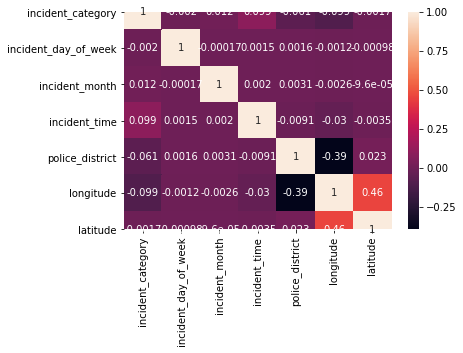

In [15]:
sn.heatmap(corrMatrix, annot=True)
plt.show()


In [16]:
third_encoded_sf_police_df.describe()

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
count,494339.000000,494339.000000,494339.000000,494339.000000,494339.000000,494339.000000,494339.000000
mean,1.455985,2.931355,6.420444,13.504745,4.442757,-122.424147,37.765539
std,1.304258,1.997947,3.439288,6.940768,3.270530,0.030287,0.372366
min,0.000000,0.000000,1.000000,0.000000,0.000000,-122.513642,37.707879
25%,0.000000,1.000000,3.000000,9.000000,2.000000,-122.435591,37.742073
50%,2.000000,3.000000,6.000000,15.000000,4.000000,-122.418091,37.768771
75%,3.000000,5.000000,9.000000,19.000000,8.000000,-122.406911,37.783260
max,3.000000,6.000000,12.000000,23.000000,10.000000,-120.500000,90.000000


In [37]:
third_encoded_sf_police_df['incident_category'].value_counts()

0    209357
3    149786
2    135196
Name: incident_category, dtype: int64

In [17]:
features_names = ['incident_day_of_week', 'incident_month', 'incident_time', 'police_district', 'longitude', 'latitude']
X = third_encoded_sf_police_df[features_names]
y = third_encoded_sf_police_df['incident_category']
X

,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,5,6,1,0,-122.396010,37.747262
1,4,9,22,0,-122.385000,37.755520
2,2,9,21,0,-122.394589,37.752427
3,4,3,17,8,-122.412447,37.775634
4,4,4,22,2,-122.417108,37.712256
...,...,...,...,...,...,...
761463,1,1,1,3,-122.428949,37.767504
761464,1,1,1,10,-122.409775,37.786659
761465,1,1,0,3,-122.405828,37.768473
761467,1,1,0,0,-122.374928,37.729660


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [20]:
# Create Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print(logreg.score(X_train_scaled, y_train))
print(logreg.score(X_test_scaled, y_test))

C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\flyto\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.4435016210209465
0.44094348019581664


In [22]:
# Decision Trees Model
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train_scaled, y_train)
print(clf.score(X_train_scaled, y_train))
print(clf.score(X_test_scaled, y_test))

0.9769092174325833
0.5236153254844844


In [24]:
dt2 = DecisionTreeClassifier(max_depth=3)
dt2.fit(X_train_scaled, y_train)
print(dt2.score(X_train_scaled,y_train))
print(dt2.score(X_test_scaled,y_test))

0.45252107866671704
0.45181858639802563


In [25]:
# Linear Discriminant Analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)
print(lda.score(X_train_scaled, y_train))
print(lda.score(X_test_scaled, y_test))

0.4443943962843287
0.44174454828660437


In [26]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)
print(gnb.score(X_train_scaled, y_train))
print(gnb.score(X_test_scaled, y_test))



0.2937527309213117
0.2935793178783833


In [34]:
# K-Nearest Neighbor 
from sklearn.neighbors import KNeighborsClassifier
# for k in range(1,100):
#     print("k = ",k)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))

0.6168591572848843
0.4407897398551604


C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':
C:\Users\flyto\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  del sys.path[0]


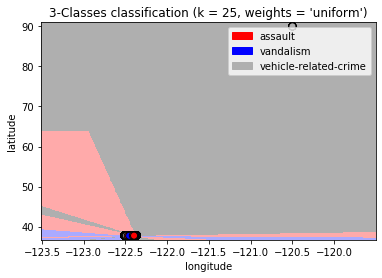

In [44]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches


X = third_encoded_sf_police_df[features_names]
y = third_encoded_sf_police_df['incident_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

def plot_crime_knn(X, y, n_neighbors, weights):
    X_mat = X[['longitude','latitude']].as_matrix()
    y_mat = y.as_matrix()
    
    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AFAFAF'])
    cmap_bold = ListedColormap(["#FF0000", "#00FF00", '#0000FF', '#AFAFAF'])
    
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat,y_mat)
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='assault')
    patch2 = mpatches.Patch(color='#0000FF', label='vandalism')
    patch3 = mpatches.Patch(color='#AFAFAF', label='vehicle-related-crime')
    plt.legend(handles=[patch0, patch2, patch3])
    plt.xlabel('longitude')
    plt.ylabel('latitude')
    plt.title("3-Classes classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.show()
    

plot_crime_knn(X_train,y_train,25,'uniform')

Getting score...
Getting score...


([<matplotlib.axis.XTick at 0x17a8195fac8>,
 <a list of 2 Text xticklabel objects>)

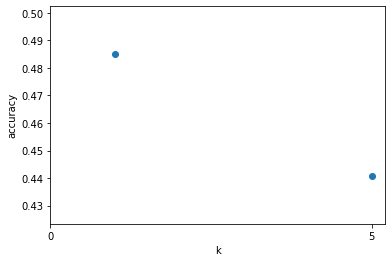

In [42]:
k_range = (1,5)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    print("Getting score...")
    scores.append(knn.score(X_test_scaled, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5])

In [ ]:
# Support Vector Machine 
# from sklearn.svm import SVC

# svm = SVC()
# svm.fit(X_train_scaled, y_train)
# print(svm.score(X_train_scaled,y_train))
# print(svm.score(X_test_scaled,y_test))


In [45]:
# Predicting the test set results
ypred = knn.predict(X_test_scaled)
df = pd.DataFrame({"test": y_test, "computer prediction": ypred})
#ypred

In [50]:
df

,test,computer prediction
676681,3,3
735268,2,2
489785,3,0
147849,0,3
124771,3,3
...,...,...
118631,3,2
296265,0,0
429510,2,0
649847,3,3


In [47]:
df['computer prediction'].value_counts()

0    71488
2    26118
3    25979
Name: computer prediction, dtype: int64

In [48]:
import pickle
# Saving the model to disk

pickle.dump(knn, open('sf_reduced_crime_model_knn.pkl', 'wb'))

In [49]:
# Loading the model to compare the results
# incident_day_of_week	incident_month	incident_time	police_district	longitude	latitude
model = pickle.load(open('sf_reduced_crime_model_knn.pkl', 'rb'))
print(model.predict([[0.663,0.100,1,0.43,0.04,0.23]]))

[0]


In [53]:
import pandas 
df1 = pd.read_csv('final_encoded_sf_police_data.csv')

In [54]:

X = 

,incident_category,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,0,5,6,1,0,-122.396010,37.747262
1,0,4,9,22,0,-122.385000,37.755520
2,0,2,9,21,0,-122.394589,37.752427
3,0,4,3,17,8,-122.412447,37.775634
4,0,4,4,22,2,-122.417108,37.712256
...,...,...,...,...,...,...,...
494334,0,1,1,1,3,-122.428949,37.767504
494335,0,1,1,1,10,-122.409775,37.786659
494336,0,1,1,0,3,-122.405828,37.768473
494337,2,1,1,0,0,-122.374928,37.729660


In [77]:
features_names = ['incident_day_of_week', 'incident_month', 'incident_time', 'police_district', 'longitude', 'latitude']
X = third_encoded_sf_police_df[features_names]
X
live = pd.DataFrame([[5, 3, 23, 0, -122.41247, 37.755520]], columns=features_names)
live_df = pd.concat([X,live], ignore_index=True)
live_df

,incident_day_of_week,incident_month,incident_time,police_district,longitude,latitude
0,5,6,1,0,-122.396010,37.747262
1,4,9,22,0,-122.385000,37.755520
2,2,9,21,0,-122.394589,37.752427
3,4,3,17,8,-122.412447,37.775634
4,4,4,22,2,-122.417108,37.712256
...,...,...,...,...,...,...
494335,1,1,1,10,-122.409775,37.786659
494336,1,1,0,3,-122.405828,37.768473
494337,1,1,0,0,-122.374928,37.729660
494338,1,1,0,0,-122.383638,37.736605


In [74]:
# Create Scaling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(live_df)
X_train_scaled
X_train_scaled[-1]

array([8.33333333e-01, 1.81818182e-01, 1.00000000e+00, 0.00000000e+00,
       5.02433208e-02, 9.11054604e-04])

In [75]:
model.predict([[8.33333333e-01, 1.81818182e-01, 1.00000000e+00, 0.00000000e+00,
       5.02433208e-02, 9.11054604e-04]])

array([3], dtype=int64)